In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
pd.set_option('display.max_columns',70)

In [140]:
pd.set_option('display.max_rows',180)

In [92]:
stats = pd.read_csv("data/player_mvp_advanced_stats.csv")

In [93]:
stats.shape

(17959, 62)

In [96]:
stats.isnull().sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS          280
MP_x          0
FG            0
FGA           0
FG%          63
3P            0
3PA           0
3P%        2680
2P            0
2PA           0
2P%         106
eFG%         63
FT            0
FTA           0
FT%         581
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
MP_y          0
PER           3
TS%          55
3PAr         63
FTr          63
ORB%          3
DRB%          3
TRB%          3
AST%          3
STL%          3
BLK%          3
TOV%         46
USG%          3
OWS           0
DWS           0
WS            0
WS/48         3
OBPM          0
DBPM          0
BPM           0
VORP          0
dtype: i

In [97]:
stats[stats["3P%"].isnull()][["Player","3PA","3P%"]]

,Player,3PA,3P%
3,Jerome Henderson,0.0,NaN
5,Kurt Rambis,0.0,NaN
12,Pétur Guðmundsson,0.0,NaN
20,Kurt Rambis,0.0,NaN
23,Mike Smrek,0.0,NaN
...,...,...,...
17932,Joe Meriweather,0.0,NaN
17933,Kenny Dennard,0.0,NaN
17936,Leon Douglas,0.0,NaN
17940,Reggie King,0.0,NaN


In [98]:
stats[stats["FT%"].isnull()][["Player","FTA","FT%"]]

,Player,FTA,FT%
3,Jerome Henderson,0.0,NaN
144,John Coker,0.0,NaN
159,Jason Sasser,0.0,NaN
170,Adrian Caldwell,0.0,NaN
186,Bruno Šundov,0.0,NaN
...,...,...,...
17778,Mark McNamara,0.0,NaN
17806,Luke Zeller,0.0,NaN
17859,Myron Brown,0.0,NaN
17881,Malcolm Lee,0.0,NaN


In [99]:
stats.fillna(0, inplace = True)

In [100]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP_x', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS', 'MP_y', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [106]:
features = ['Age', 'G', 'GS', 'MP_x', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
            'W', 'L', 'W/L%', 'GB', 'PS/G','PA/G', 'SRS','PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS',
       'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

## Train test split

In [107]:
train = stats[stats["Year"] < 2022]
test = stats[stats["Year"] == 2022]

In [108]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [109]:
ridge = Ridge(alpha = .1)

In [110]:
ridge.fit(train[features], train["Share"])

Ridge(alpha=0.1)

In [111]:
preds = ridge.predict(test[features])

In [112]:
preds = pd.DataFrame(preds, columns = ["predictions"], index = test.index)

In [113]:
preds

,predictions
715,-0.011589
716,-0.042163
717,-0.000217
718,0.003795
719,-0.016701
...,...
15131,0.004756
15132,-0.001328
15133,-0.002516
15134,-0.005816


In [185]:
combine = pd.concat([test[["Player","Share","Year"]], preds], axis =1)

In [186]:
combine

,Player,Share,Year,predictions
715,Aaron Gordon,0.0,2022,-0.011589
716,Austin Rivers,0.0,2022,-0.042163
717,Bol Bol,0.0,2022,-0.000217
718,Bones Hyland,0.0,2022,0.003795
719,Bryn Forbes,0.0,2022,-0.016701
...,...,...,...,...
15131,Micah Potter,0.0,2022,0.004756
15132,Rodney McGruder,0.0,2022,-0.001328
15133,Saben Lee,0.0,2022,-0.002516
15134,Saddiq Bey,0.0,2022,-0.005816


In [187]:
combine.sort_values("Share", ascending = False).head(10)

,Player,Share,Year,predictions
730,Nikola Jokić,0.875,2022,0.265256
904,Joel Embiid,0.706,2022,0.185180
14225,Giannis Antetokounmpo,0.595,2022,0.235504
974,Devin Booker,0.216,2022,0.075031
14016,Luka Dončić,0.146,2022,0.176381
1246,Jayson Tatum,0.043,2022,0.112005
14849,Ja Morant,0.010,2022,0.097849
7524,Stephen Curry,0.004,2022,0.081643
972,Chris Paul,0.002,2022,0.066076
9573,LeBron James,0.001,2022,0.131443


In [117]:
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
mean_squared_error(combine["Share"],combine["predictions"])

0.0018516051024500353

In [119]:
combine["Share"].value_counts()

0.000    593
0.001      3
0.875      1
0.706      1
0.002      1
0.216      1
0.043      1
0.004      1
0.146      1
0.595      1
0.010      1
Name: Share, dtype: int64

In [188]:
combine = combine.sort_values("Share",ascending = False)
combine["Rank"] = list(range(1,combine.shape[0]+1))

In [189]:
combine.head(10)

,Player,Share,Year,predictions,Rank
730,Nikola Jokić,0.875,2022,0.265256,1
904,Joel Embiid,0.706,2022,0.185180,2
14225,Giannis Antetokounmpo,0.595,2022,0.235504,3
974,Devin Booker,0.216,2022,0.075031,4
14016,Luka Dončić,0.146,2022,0.176381,5
1246,Jayson Tatum,0.043,2022,0.112005,6
14849,Ja Morant,0.010,2022,0.097849,7
7524,Stephen Curry,0.004,2022,0.081643,8
972,Chris Paul,0.002,2022,0.066076,9
9573,LeBron James,0.001,2022,0.131443,10


In [190]:
combine = combine.sort_values("predictions", ascending= False)
combine["pred_rank"] = list(range(1,combine.shape[0]+1))

In [191]:
combine.head(10)

,Player,Share,Year,predictions,Rank,pred_rank
730,Nikola Jokić,0.875,2022,0.265256,1,1
14225,Giannis Antetokounmpo,0.595,2022,0.235504,3,2
904,Joel Embiid,0.706,2022,0.185180,2,3
14016,Luka Dončić,0.146,2022,0.176381,5,4
9573,LeBron James,0.001,2022,0.131443,10,5
7311,Kevin Durant,0.001,2022,0.115032,12,6
1246,Jayson Tatum,0.043,2022,0.112005,6,7
14367,Trae Young,0.000,2022,0.107129,289,8
14849,Ja Morant,0.010,2022,0.097849,7,9
9608,Karl-Anthony Towns,0.000,2022,0.092362,121,10


In [192]:
combine.sort_values("Share",ascending = False).head(10)

,Player,Share,Year,predictions,Rank,pred_rank
730,Nikola Jokić,0.875,2022,0.265256,1,1
904,Joel Embiid,0.706,2022,0.185180,2,3
14225,Giannis Antetokounmpo,0.595,2022,0.235504,3,2
974,Devin Booker,0.216,2022,0.075031,4,17
14016,Luka Dončić,0.146,2022,0.176381,5,4
1246,Jayson Tatum,0.043,2022,0.112005,6,7
14849,Ja Morant,0.010,2022,0.097849,7,9
7524,Stephen Curry,0.004,2022,0.081643,8,14
972,Chris Paul,0.002,2022,0.066076,9,20
7311,Kevin Durant,0.001,2022,0.115032,12,6


In [125]:
def find_avg_precision(combine):
    actual = combine.sort_values("Share", ascending = False).head(5)
    predicted = combine.sort_values("predictions", ascending = False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps)/len(ps)

In [126]:
find_avg_precision(combine)

0.8588235294117647

### Backtesting

In [127]:
years = list(range(1981, 2023))

In [128]:
aps = []
all_predictions = []

for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    ridge.fit(train[features], train["Share"])
    preds = ridge.predict(test[features])
    preds = pd.DataFrame(preds, columns = ["predictions"], index = test.index)
    combine = pd.concat([test[["Player","Share","Year"]], preds], axis =1)
    all_predictions.append(combine)
    aps.append(find_avg_precision(combine))
              
              

In [129]:
mean_avg_prec = sum(aps)/len(aps)
print(mean_avg_prec)

0.7959558527606921


In [130]:
def add_ranks(combine):
    combine = combine.sort_values("Share", ascending = False)
    combine["Rank"] = list(range(1,combine.shape[0]+1))
    combine = combine.sort_values("predictions", ascending = False)
    combine["pred_rank"] = list(range(1,combine.shape[0]+1))
    combine["Diff_rank"] = combine["Rank"]- combine["pred_rank"]
    return combine
    
    

In [131]:
add_ranks(all_predictions[1])[add_ranks(all_predictions[1])["Rank"]<6].sort_values("Diff_rank", ascending = False)

,Player,Share,predictions,Rank,pred_rank,Diff_rank
7855,Larry Bird,0.347,0.355819,3,1,2
12460,Michael Jordan,0.576,0.265287,2,2,0
10456,Dominique Wilkins,0.164,0.168627,5,5,0
21,Magic Johnson,0.940,0.255782,1,3,-2
7854,Kevin McHale,0.326,0.135568,4,9,-5


In [196]:
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share","Year"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_abs_precision(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)


In [197]:
mean_ap, aps, all_predictions = backtest(stats, ridge, years[5:], features)

In [198]:
mean_ap

0.7959558527606921

In [199]:
# biggest differences in rank
all_predictions[all_predictions["Rank"]<6 & ].sort_values("Diff_rank").head(10)

,Player,Share,Year,predictions,Rank,pred_rank,Diff_rank
10006,Glen Rice,0.117,1997,0.031859,5,53,-48
10274,Peja Stojaković,0.228,2004,0.051443,4,34,-30
5508,Hakeem Olajuwon,0.247,1986,0.062035,4,29,-25
6546,Steve Nash,0.839,2005,0.061435,1,26,-25
6564,Steve Nash,0.739,2006,0.073047,1,26,-25
16505,Patrick Ewing,0.235,1989,0.082194,4,23,-19
14572,Tony Parker,0.274,2012,0.056502,5,23,-18
5035,Stephen Curry,0.173,2019,0.079657,5,21,-16
1566,Chris Paul,0.138,2021,0.061817,5,20,-15
6370,Jason Kidd,0.135,1999,0.045170,5,19,-14


In [207]:
stats[(stats['Player']== "Glen Rice") & (stats["Year"]==1997)]

,Player,Pos,Age,Tm,G,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MP_y,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,NPos,NTm
10006,Glen Rice,SF,29.0,CHH,79.0,78.0,42.6,9.1,19.2,0.477,2.6,5.6,0.47,6.5,13.6,0.48,0.546,5.9,6.8,0.867,0.8,3.2,4.0,2.0,0.9,0.3,2.2,2.4,26.8,1997,134.0,1150.0,0.117,Charlotte Hornets,54.0,28.0,0.659,15.0,98.9,97.0,2.13,3362,19.7,0.605,0.291,0.354,2.5,8.8,5.7,8.8,1.2,0.6,9.2,26.9,9.6,1.2,10.8,0.154,3.9,-2.1,1.8,3.2,8,4


In [202]:
all_predictions[all_predictions["Rank"]<6].sort_values("predictions", ascending = False).head(10)

,Player,Share,Year,predictions,Rank,pred_rank,Diff_rank
12951,Michael Jordan,0.704,1989,0.360564,2,1,1
7855,Larry Bird,0.347,1987,0.355819,3,1,2
10541,David Robinson,0.723,1994,0.338796,2,1,1
13215,Larry Bird,0.981,1986,0.328058,1,1,0
17538,Kevin Garnett,0.991,2004,0.313646,1,1,0
47,Magic Johnson,0.782,1989,0.313235,1,2,-1
11990,Michael Jordan,0.613,1990,0.310522,3,1,2
11477,Larry Bird,0.659,1988,0.308713,2,1,1
59,Magic Johnson,0.691,1990,0.304472,1,2,-1
6913,LeBron James,0.969,2009,0.301843,1,1,0


In [208]:
coefficient_table = pd.concat([pd.Series(ridge.coef_),pd.Series(features)], axis = 1).sort_values(0, ascending = False)

In [210]:
coefficient_table.rename(columns = {0:"coefficients",1:"features"},inplace = True)

In [212]:
coefficient_table

,Coefficients,features
13,0.159433,eFG%
29,0.065329,W/L%
49,0.029194,WS/48
18,0.026823,DRB
53,0.025355,VORP
16,0.019836,FT%
15,0.018634,FTA
5,0.017677,FGA
23,0.014241,TOV
10,0.013642,2P


In [215]:
coefficient_table = coefficient_table.iloc[:,[1,0]]

In [216]:
coefficient_table

,features,Coefficients
13,eFG%,0.159433
29,W/L%,0.065329
49,WS/48,0.029194
18,DRB,0.026823
53,VORP,0.025355
16,FT%,0.019836
15,FTA,0.018634
5,FGA,0.017677
23,TOV,0.014241
10,2P,0.013642


In [221]:
top_ten_coeff = coefficient_table['features'][:10].tolist()

In [204]:
stats["NPos"] = stats["Pos"].astype("category").cat.codes
stats["NTm"] = stats["Tm"].astype("category").cat.codes

In [205]:
stats["NTm"].value_counts()

7     662
28    653
11    649
0     646
8     644
19    644
32    642
12    638
16    634
9     634
1     631
10    630
25    628
13    626
5     624
29    622
30    618
36    617
15    611
31    555
18    539
27    509
20    495
21    488
35    441
38    410
34    398
17    353
39    251
26    240
4     209
2     182
24    163
3     157
22    143
6     130
37     88
14     63
33     60
23     32
Name: NTm, dtype: int64

## Random Forest

In [146]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 50,
                           random_state=42, min_samples_split = 5)


In [148]:
mean_ap, aps, all_predictions = backtest(stats, rf, years[5:], features)

In [149]:
mean_ap

0.8280986920117354

In [153]:
all_predictions[all_predictions["Rank"]<6].sort_values("Diff_rank").head(10)

,Player,Share,predictions,Rank,pred_rank,Diff_rank
6546,Steve Nash,0.839,0.029875,1,21,-20
10006,Glen Rice,0.117,0.020417,5,23,-18
1566,Chris Paul,0.138,0.010366,5,23,-18
6564,Steve Nash,0.739,0.064171,1,15,-14
1401,Jason Kidd,0.712,0.036694,2,14,-12
14572,Tony Parker,0.274,0.018967,5,13,-8
2734,Jermaine O'Neal,0.425,0.048489,3,11,-8
5508,Hakeem Olajuwon,0.247,0.075066,4,12,-8
1538,Paul George,0.352,0.076973,3,11,-8
16198,Joakim Noah,0.258,0.047099,4,11,-7


In [154]:
all_predictions[all_predictions["Rank"]<6].sort_values("Diff_rank", ascending= False).head(10)

,Player,Share,predictions,Rank,pred_rank,Diff_rank
10812,Chris Paul,0.159,0.544931,5,2,3
4359,Chauncey Billups,0.344,0.546873,5,2,3
1830,Karl Malone,0.258,0.350805,4,2,2
8374,Tracy McGrady,0.359,0.539455,4,2,2
6901,LeBron James,0.348,0.455053,4,2,2
12027,Michael Jordan,0.577,0.691781,3,1,2
16139,Dwyane Wade,0.097,0.268583,5,3,2
2591,Dirk Nowitzki,0.435,0.603867,3,1,2
15787,Kawhi Leonard,0.495,0.454641,3,1,2
11968,Giannis Antetokounmpo,0.345,0.300777,4,2,2


In [155]:
all_predictions[(all_predictions["Rank"]<6)& (all_predictions["Player"]== "Kawhi Leonard")]

,Player,Share,predictions,Rank,pred_rank,Diff_rank
7691,Kawhi Leonard,0.484,0.377565,2,4,-2
15787,Kawhi Leonard,0.495,0.454641,3,1,2
6682,Kawhi Leonard,0.166,0.115266,5,7,-2


In [161]:
stats.iloc[[15787]]

,Player,Pos,Age,Tm,G,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MP_y,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,NPos,NTm
15787,Kawhi Leonard,SF,25.0,SAS,74.0,74.0,33.4,8.6,17.7,0.485,2.0,5.2,0.38,6.6,12.5,0.529,0.541,6.3,7.2,0.88,1.1,4.7,5.8,3.5,1.8,0.7,2.1,1.6,25.5,2017,500.0,1010.0,0.495,San Antonio Spurs,61.0,21.0,0.744,0.0,105.3,98.1,7.13,2474,27.6,0.61,0.295,0.406,3.7,15.7,9.8,18.9,2.7,1.8,9.1,31.1,8.9,4.7,13.6,0.264,7.1,2.2,9.4,7.1,8,32


In [162]:
stats.iloc[[1401]]

,Player,Pos,Age,Tm,G,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MP_y,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,NPos,NTm
1401,Jason Kidd,PG,28.0,NJN,82.0,82.0,37.3,5.4,13.9,0.391,1.4,4.4,0.321,4.0,9.4,0.424,0.442,2.5,3.0,0.814,1.6,5.7,7.3,9.9,2.1,0.2,3.5,1.7,14.7,2002,897.0,1260.0,0.712,New Jersey Nets,52.0,30.0,0.634,0.0,96.2,92.0,3.67,3056,19.1,0.484,0.32,0.217,4.7,17.2,10.9,42.5,3.0,0.5,18.7,22.5,3.1,5.8,8.9,0.14,3.0,1.5,4.5,5.0,5,21


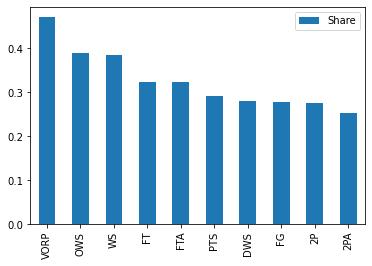

In [182]:
stats.corr()[['Share']].sort_values(by= 'Share', ascending = False)[3:].head(10).plot(kind='bar');

In [184]:
stats.corr()[['Share']].sort_values(by= 'Share', ascending = False)[1:]

,Share
Pts Won,0.985668
Pts Max,0.515527
VORP,0.470344
OWS,0.388965
WS,0.384455
FT,0.323144
FTA,0.323034
PTS,0.292717
DWS,0.280981
FG,0.278888
